<a href="https://colab.research.google.com/github/likuspandan/Virtual-Tryon-Images/blob/main/21BCE0605.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/switchablenorms/DeepFashion_Try_On.git

fatal: destination path 'DeepFashion_Try_On' already exists and is not an empty directory.


In [ ]:
%cd DeepFashion_Try_On

/content/DeepFashion_Try_On


In [ ]:
!mkdir Dataset

In [ ]:
import shutil
zip_file_path = '/content/drive/MyDrive/Virtual Tryon/ACGPN_TestData.zip'
extract_to_dir = '/content/DeepFashion_Try_On/Dataset'
shutil.unpack_archive(zip_file_path, extract_to_dir)

In [ ]:
import shutil
zip_file_path = '/content/drive/MyDrive/Virtual Tryon/ACGPN_TrainData.zip'
extract_to_dir = '/content/DeepFashion_Try_On/Dataset'
shutil.unpack_archive(zip_file_path, extract_to_dir)

In [ ]:
import os
print('test image    :', len(os.listdir('/content/DeepFashion_Try_On/Dataset/test_img')))   # test image (person with clothes)
print('test pose     :', len(os.listdir('/content/DeepFashion_Try_On//Dataset/test_pose')))  # pose keypoints per test image
print('test label    :', len(os.listdir('/content/DeepFashion_Try_On//Dataset/test_label'))) # label (dark frame) of test image (for pose-map)
print('test color    :', len(os.listdir('/content/DeepFashion_Try_On//Dataset/test_color')))     # color clothes
print('test edge     :', len(os.listdir('/content/DeepFashion_Try_On//Dataset/test_edge')))      # edge of clothes
print('test mask     :', len(os.listdir('/content/DeepFashion_Try_On//Dataset/test_mask')))      # test mask
print('test colormask:', len(os.listdir('/content/DeepFashion_Try_On//Dataset/test_colormask'))) # test colormask

test image    : 2032
test pose     : 2032
test label    : 2032
test color    : 2032
test edge     : 2032
test mask     : 12000
test colormask: 10000


In [ ]:
import numpy as np
import json
#pose_name = '/kaggle/input/tryon-testdata/Dataset/test_pose/000000_0_keypoints.json'
pose_name = '/content/DeepFashion_Try_On/Dataset/test_pose/000001_0_keypoints.json'
with open(pose_name, 'r') as f:
     pose_label = json.load(f)
     pose_data = pose_label['people'][0]['pose_keypoints']
     pose_data = np.array(pose_data)
     pose_data = pose_data.reshape((-1,3))
print(pose_data)
print(len(pose_data))

[[1.11118110e+02 3.04872727e+01 9.11333680e-01]
 [1.06834646e+02 8.09890909e+01 7.91559875e-01]
 [7.45826772e+01 7.44727273e+01 7.21727289e-01]
 [6.29921260e+01 1.39170909e+02 4.29177985e-01]
 [5.06456693e+01 1.98981818e+02 6.39894508e-01]
 [1.37070866e+02 8.61090909e+01 6.33171842e-01]
 [1.41354331e+02 1.49178182e+02 3.72977426e-01]
 [1.31779528e+02 2.25978182e+02 4.07722341e-01]
 [7.35748031e+01 2.01774545e+02 3.96848263e-01]
 [3.80472441e+01 2.55301818e+02 1.09410599e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.12881890e+02 2.04101818e+02 3.39129466e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.04566929e+02 2.37381818e+01 9.71781179e-01]
 [1.21700787e+02 2.51345455e+01 9.51698855e-01]
 [9.49921260e+01 3.16509091e+01 8.77784505e-01]
 [1.33543307e+02 3.49090909e+01 9.04681012e-01]]
18


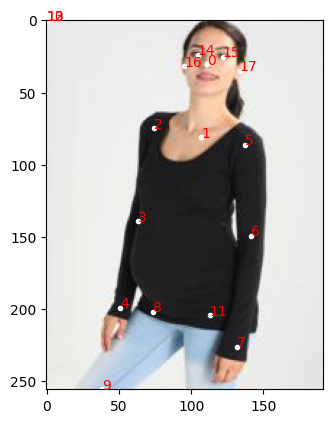

18


In [ ]:
import matplotlib.pyplot as plt
img = plt.imread('/content/DeepFashion_Try_On/Dataset/test_img/000001_0.jpg')
plt.imshow(img)
i=0
for x,y,z in pose_data:
    plt.plot(x, y, 'w.') # 'w.': color='white', marker='.'
    plt.text(x, y, str(i), color='r', fontsize=10)
    i+=1
plt.show()
print(i)

In [ ]:
%cd ACGPN_inference

/content/DeepFashion_Try_On/ACGPN_inference


In [ ]:
!cp -rf /content/DeepFashion_Try_On/ACGPN_inference/models checkpoints

In [ ]:
!pip install tensorboardX



In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!python /content/DeepFashion_Try_On/ACGPN_train/models/test.py --dataroot /content/DeepFashion_Try_On/Dataset/test_color/000129_1.jpg

In [ ]:
import os
if not os.path.exists('./sample'):
    os.makedirs('./sample')

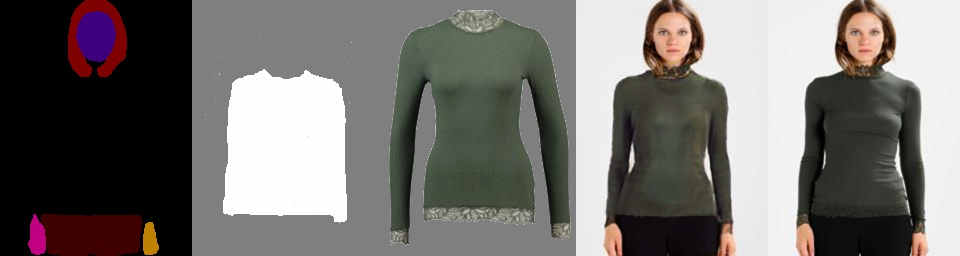

In [ ]:
from IPython.display import Image
Image('/content/DeepFashion_Try_On/ACGPN_train/sample/000154_0.jpg')